In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing for Training Data

In [3]:
train_data = pd.read_csv('train_dataset.csv')
train_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [4]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2293.0,7.082265,1.486029,0.000000,6.262799,7.080795,7.873272,14.000000
Hardness,2293.0,196.390335,32.460633,47.432000,176.753500,196.833001,216.441172,317.338124
Solids,2293.0,22074.335334,8668.693908,320.942611,15825.182571,21153.322827,27345.174288,56351.396304
Chloramines,2293.0,7.132987,1.573879,0.530351,6.140033,7.135063,8.104498,13.043806
Sulfate,2293.0,333.393347,36.116271,180.206746,316.552791,333.775777,349.985243,481.030642
Conductivity,2293.0,425.455702,80.266652,201.619737,363.974060,420.828362,480.715208,753.342620
Organic_carbon,2293.0,14.229174,3.341429,2.200000,12.015868,14.151538,16.450990,28.300000
Trihalomethanes,2293.0,66.499518,16.067742,0.738000,56.329076,66.396293,77.182622,124.000000
Turbidity,2293.0,3.967153,0.788480,1.450000,3.440753,3.947138,4.503661,6.739000
Potability,2293.0,0.390318,0.487928,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
missing_percentage = train_data.isna().sum() / len(train_data) * 100

print("Percentage of Missing Values in Each Column:")
print(missing_percentage)


Percentage of Missing Values in Each Column:
ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64


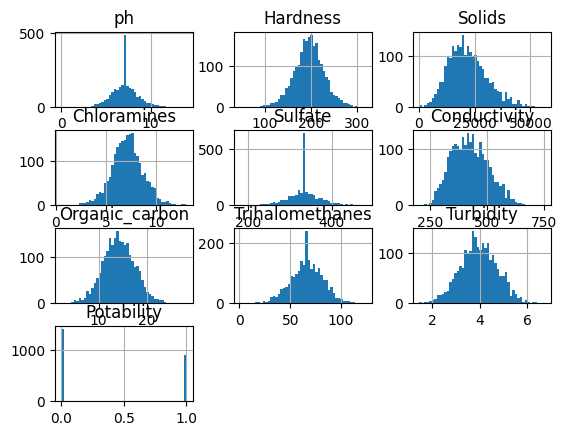

In [6]:
## Make sure the data is normally distributed 
train_data.hist(bins=50);

In [7]:
train_duplicates = train_data.duplicated()
print("Number of duplicate rows in training data:", train_duplicates.sum())


Number of duplicate rows in training data: 0


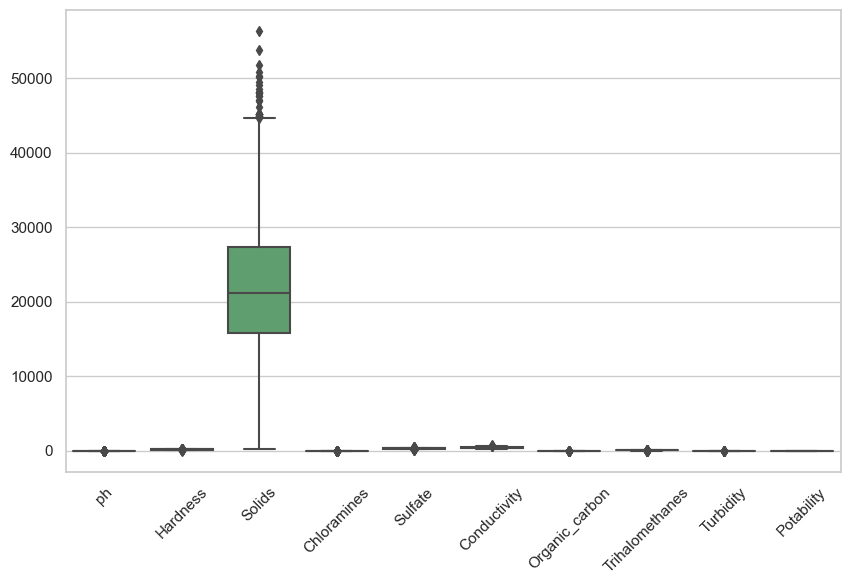

In [8]:
#check the outlaiers
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=train_data)  # Create the box plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [9]:
train_data['Solids']=np.where(train_data['Solids']> 27345 ,train_data['Solids']*0.95 , train_data['Solids'])

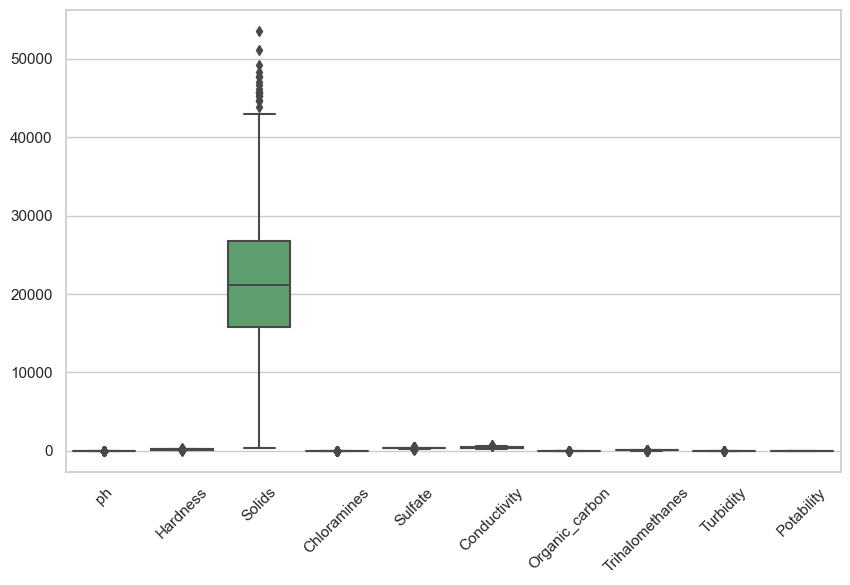

In [10]:
#check the outlaiers
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=train_data)  # Create the box plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [11]:
##Potability" column contains the target variable (the value you want to predict), and it should be separated from the rest of the data during the preprocessing and training process.
X_train = train_data.drop('Potability', axis=1).values
y_train = train_data['Potability'].values
print(train_data.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [12]:
# Apply Standard Scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data.drop('Potability', axis=1))

scaled_train_df = pd.DataFrame(X_train_scaled, columns=train_data.columns[:-1])

# Print the scaled DataFrame
print(scaled_train_df.head())

         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.000990  0.717454  0.069237    -0.799439  0.010591     -0.335680   
1 -0.200832 -0.084328 -0.988498    -1.246577 -0.267658      0.652954   
2 -0.721306 -0.364575 -0.707940     0.655997  2.439675     -1.382269   
3  0.683305  0.696445 -0.438754    -0.594864  0.010591     -0.609177   
4  0.666584  0.427671 -0.596038     1.055249  0.723456      1.666209   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -0.816253         2.858068  -1.234154  
1        0.247520        -0.006426  -0.909709  
2        1.821607         1.071225   1.141856  
3        1.052800        -0.410202   0.395695  
4        0.908313         0.139407   1.414489  


# Data Preprocessing for Testing Data:


In [13]:
test_data = pd.read_csv('train_dataset.csv')
test_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [14]:
X_test = test_data.drop('Potability', axis=1).values
y_test = test_data['Potability'].values
print(test_data.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [15]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(test_data.drop('Potability', axis=1))

scaled_test_df = pd.DataFrame(X_test_scaled, columns=test_data.columns[:-1])

# Print the scaled DataFrame
print(scaled_test_df.head())

         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.000990  0.717454  0.015724    -0.799439  0.010591     -0.335680   
1 -0.200832 -0.084328 -0.968896    -1.246577 -0.267658      0.652954   
2 -0.721306 -0.364575 -0.707731     0.655997  2.439675     -1.382269   
3  0.683305  0.696445 -0.457153    -0.594864  0.010591     -0.609177   
4  0.666584  0.427671 -0.603564     1.055249  0.723456      1.666209   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -0.816253         2.858068  -1.234154  
1        0.247520        -0.006426  -0.909709  
2        1.821607         1.071225   1.141856  
3        1.052800        -0.410202   0.395695  
4        0.908313         0.139407   1.414489  


In [16]:
X_test_scaled.shape
dd = data[1,1,1,1]

(2293, 9)

# DNN Model

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers

# # Build the DNN model
# model = keras.Sequential([
#     layers.Input(shape=(X_train_scaled.shape[1],)),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


# Build the DNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

Epoch 1/100
58/58 [==============================] - 2s 8ms/step - loss: 0.7301 - accuracy: 0.5796 - val_loss: 0.6570 - val_accuracy: 0.6275
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 0.6313 - accuracy: 0.6499 - val_loss: 0.6478 - val_accuracy: 0.6536
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.6783 - val_loss: 0.6454 - val_accuracy: 0.6492
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.6930 - val_loss: 0.6446 - val_accuracy: 0.6667
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 0.5834 - accuracy: 0.6957 - val_loss: 0.6461 - val_accuracy: 0.6776
Epoch 6/100
58/58 [==============================] - 0s 4ms/step - loss: 0.5687 - accuracy: 0.6990 - val_loss: 0.6444 - val_accuracy: 0.6601
Epoch 7/100
58/58 [==============================] - 0s 4ms/step - loss: 0.5618 - accuracy: 0.7050 - val_loss: 0.6434 - val_accuracy: 0.6601
Epoch 8/100
5

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)



Accuracy: 0.8892280854775403


In [19]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1314   84]
 [ 170  725]]


In [20]:
# Classification report
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1398
           1       0.90      0.81      0.85       895

    accuracy                           0.89      2293
   macro avg       0.89      0.87      0.88      2293
weighted avg       0.89      0.89      0.89      2293



In [21]:
# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9298798762797611


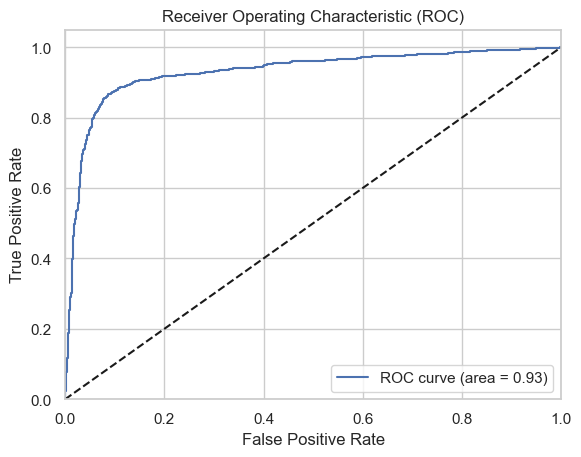

In [22]:
import matplotlib.pyplot as plt

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


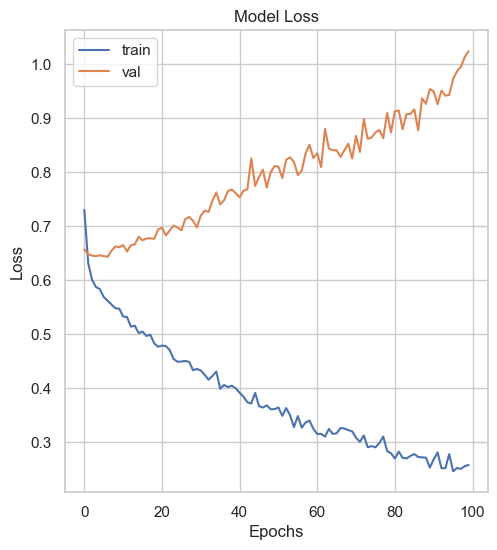

In [23]:
# Loss and accuracy plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [24]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

# Train a RNN model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape the input data to fit the RNN model
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

rnn_model = Sequential()

# Add LSTM layer(s)
rnn_model.add(LSTM(units=64, activation='relu', input_shape=(1, X_train_reshaped.shape[2])))

rnn_model.add(tf.keras.layers.BatchNormalization())

# Add a dense output layer
rnn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
rnn_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32)

# Evaluate the model on the test set
loss, accuracy = rnn_model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
72/72 [==============================] - 3s 3ms/step - loss: 0.6917 - accuracy: 0.5652
Epoch 2/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6221 - accuracy: 0.6633
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.6782
Epoch 4/100
72/72 [==============================] - 0s 3ms/step - loss: 0.5933 - accuracy: 0.6908
Epoch 5/100
72/72 [==============================] - 0s 3ms/step - loss: 0.5878 - accuracy: 0.6943
Epoch 6/100
72/72 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.6917
Epoch 7/100
72/72 [==============================] - 0s 4ms/step - loss: 0.5739 - accuracy: 0.7030
Epoch 8/100
72/72 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.6904
Epoch 9/100
72/72 [==============================] - 0s 3ms/step - loss: 0.5703 - accuracy: 0.7082
Epoch 10/100
72/72 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7069
Epoch 11/

In [ ]:
model.save("best_model.h5")

c:\Users\eslam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
!tensorflowjs_converter --input_format=keras model.h5

C:\Users\eslam\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\eslam\AppData\Local\Programs\Python\Python311\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
  File "C:\Users\eslam\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "C:\Users\eslam\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "C:\Users\eslam\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\converter.py", 